# Visualisation of proteomics expression using histograms

In [1]:
import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# import proteomic expression
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)


In [2]:
# create feature and target 

import DataFunctions as utils

drug_selected = 'Palbociclib'

# create the full dataset

palbociclib_proteomic_df = utils.create_joint_dataset_from_proteome_gdsc(drug_selected, joined_sin_peptile_exclusion_matrix, gdsc2)

feature_data, label_data = utils.create_feature_and_label(palbociclib_proteomic_df)



In [3]:
palbociclib_proteomic_df.head(2)

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,Q9Y4H2;IRS2_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q8WUQ7;CATIN_HUMAN,A6NIH7;U119B_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,...,Q5EBL4;RIPL1_HUMAN,P49715;CEBPA_HUMAN,Q5TA45;INT11_HUMAN,O14924;RGS12_HUMAN,Q7Z3B1;NEGR1_HUMAN,O60669;MOT2_HUMAN,Q13571;LAPM5_HUMAN,Q96JM2;ZN462_HUMAN,P35558;PCKGC_HUMAN,LN_IC50
SIDM00042,5.70786,NaN,NaN,6.22574,NaN,4.49579,NaN,NaN,2.87981,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.344381
SIDM00044,6.04591,3.69356,NaN,7.07092,3.49594,4.05438,NaN,NaN,3.44202,4.34237,...,3.0226,NaN,NaN,NaN,NaN,2.16952,NaN,NaN,NaN,2.482390


## Distribution of protein expression 

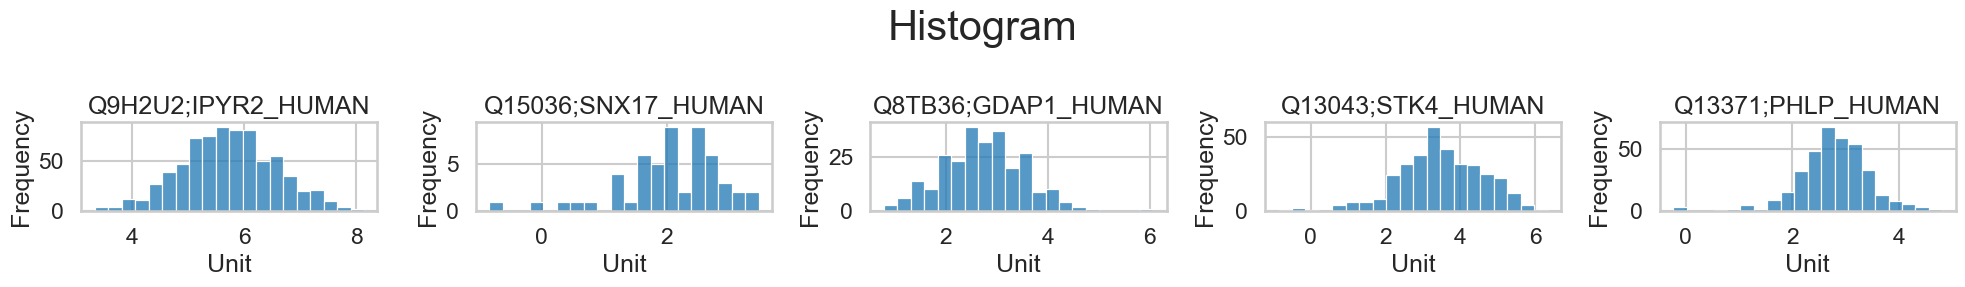

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

# select a random set of 20 features

import numpy as np

np.random.seed(16)


def random_sampling_feature_plots(feature_data, cols: pd.DataFrame, xlabel='Unit', ylabel='Frequency', title='Histogram', args=()):
    horizontal_plots = int(np.ceil(cols.shape[0] / 5))
    fig_size = (20, 3 * horizontal_plots)
    fig, axes = plt.subplots(horizontal_plots, 5, figsize=fig_size)

    for i, ax in enumerate(axes.flatten()):
        sns.histplot(feature_data[random_features[i]], bins=20, ax=ax, *args)
        ax.set_title(random_features[i])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    # set a title for the whole plot
    fig.suptitle(title, fontsize=30)
    fig.tight_layout()

    plt.show()

random_features = np.random.choice(feature_data.columns, 5, replace=False)

random_sampling_feature_plots(feature_data, random_features)


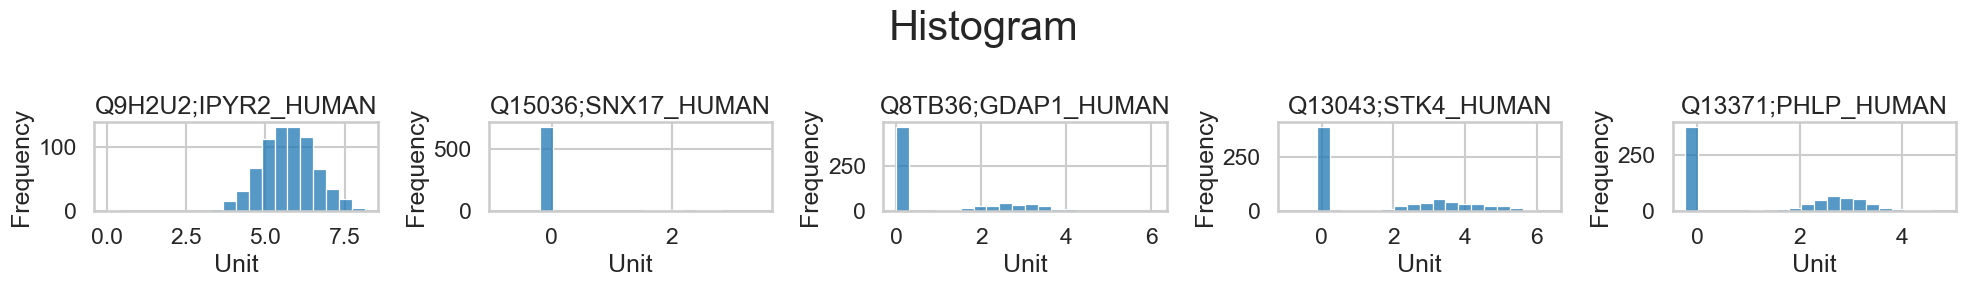

In [5]:
# fill by 0 feature data 

feature_data_zero = feature_data.fillna(0)

random_sampling_feature_plots(feature_data_zero, random_features)

c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


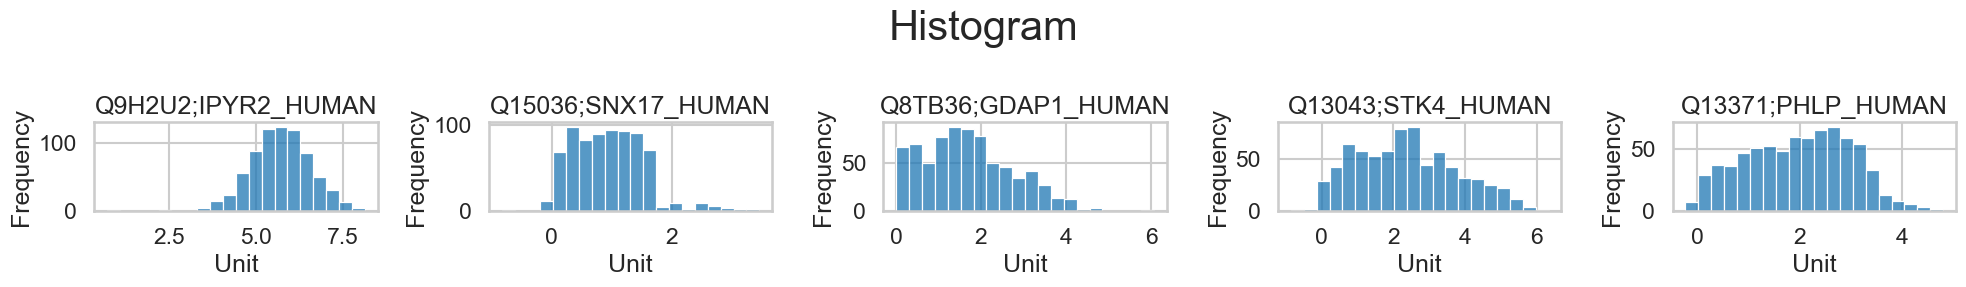

In [6]:
from toolkit import * 

# imputed_feature_data = FirstQuantileImputer().fit_transform(feature_data, return_df=True)

imputer = FirstQuantileImputer()
imputer.fit(feature_data)
imputed_feature_data = imputer.transform(feature_data, return_df=True)

random_sampling_feature_plots(imputed_feature_data, random_features)

# random_sampling_feature_plots(imputed_feature_data, random_features)

In [7]:
# for each feature in the dataset, plot the distribution of the feature as a histogram and save the plot

run_code = False
save_path = 'data//results//visualising_omics_dataset//all_distributions_goncalves'

if run_code:
    for feature in feature_data.columns:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.histplot(feature_data[feature], bins=20, ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Expression (maxLFQ)')
        ax.set_ylabel('Frequency')
        fig.tight_layout()
        fig.savefig(f'{save_path}//{feature}.png')
        plt.close(fig)
        

In [8]:
# # using the same random features, plot the correlation between each feature and the target

# fig, axes = plt.subplots(4, 5, figsize=(20, 15))

# for i, ax in enumerate(axes.flatten()):
#     col = random_features[i]
#     X = palbociclib_proteomic_df[col]
#     Y = palbociclib_proteomic_df['LN_IC50']
#     ax.scatter(X, Y, color='purple', alpha=0.5, s=10)
#     m, b = np.polyfit(X, Y, 1)
#     ax.plot(X, m*X + b, color='grey')
#     corr = str(round(np.corrcoef(X, Y)[0, 1], 2))

#     # insert annotations
#     ax.text(0.05, 0.95, f'r={corr}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
#     ax.set_title(f'{col}')
#     ax.set_xlabel('Expression')
#     ax.set_ylabel('Palbociclib (LN_IC50)')

# plt.tight_layout()
# plt.show()

## Missing data imputation

In [9]:
# given the feature data, remove the features with too many missing values, remove if more than 50% of the data is missing

missing_50_feature_data = feature_data.dropna(axis=1, thresh=feature_data.shape[0]*0.5)
new_shape = missing_50_feature_data.shape
print(f'Number of features with less than 50% missing values: {new_shape[1]}')

Number of features with less than 50% missing values: 6692


In [10]:
missing_50_feature_data.head(2)

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,Q9Y4H2;IRS2_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q8WUQ7;CATIN_HUMAN,A6NIH7;U119B_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,...,P33151;CADH5_HUMAN,Q5EBL4;RIPL1_HUMAN,P49715;CEBPA_HUMAN,Q5TA45;INT11_HUMAN,O14924;RGS12_HUMAN,Q7Z3B1;NEGR1_HUMAN,O60669;MOT2_HUMAN,Q13571;LAPM5_HUMAN,Q96JM2;ZN462_HUMAN,P35558;PCKGC_HUMAN
SIDM00042,5.70786,2.186536,0.683669,6.22574,2.434375,4.49579,0.759160,1.335486,2.87981,4.184371,...,0.576918,0.820502,2.203486,0.314261,0.545253,1.575866,0.224368,0.115409,0.363213,0.005250
SIDM00044,6.04591,3.693560,0.763739,7.07092,3.495940,4.05438,0.175267,1.288285,3.44202,4.342370,...,1.985707,3.022600,0.336379,1.269476,0.920911,2.410525,2.169520,1.762449,0.827790,0.662023


In [11]:
# for the remaining nan values, 
# replace with the value between 0 to 25th percentile of the feature 
# under the assumption that the missing values are lowly expressed

q = missing_50_feature_data.quantile(0.25)

for col in missing_50_feature_data.columns:
    print(f'filling between 0 to {q[col]} for {col}')
    value = np.random.uniform(0, q[col], size=missing_50_feature_data[col].shape[0])
    # convert value to pandas series
    value = pd.Series(value, index=missing_50_feature_data[col].index)
    # fillna 
    missing_50_feature_data[col].fillna(value, inplace=True)
    # for each nan value, replace with the random value
    # for i, v in enumerate(missing_50_feature_data[col].isna()):
    #     if v:
    #         missing_50_feature_data[col][i] = value[i]
    #         print(f'filling {value[i]} for {col} at index {i}')



filling between 0 to 6.08135 for P37108;SRP14_HUMAN
filling between 0 to 2.387377851681269 for Q96JP5;ZFP91_HUMAN
filling between 0 to 0.5847200166282472 for Q9Y4H2;IRS2_HUMAN
filling between 0 to 6.99447 for P36578;RL4_HUMAN
filling between 0 to 2.30485 for Q6SPF0;SAMD1_HUMAN
filling between 0 to 4.28715 for O76031;CLPX_HUMAN
filling between 0 to 0.2434000135861408 for Q8WUQ7;CATIN_HUMAN
filling between 0 to 0.7678688488139839 for A6NIH7;U119B_HUMAN
filling between 0 to 2.92665 for Q9BTD8;RBM42_HUMAN
filling between 0 to 4.31451 for Q9P258;RCC2_HUMAN
filling between 0 to 5.31153 for Q8TCS8;PNPT1_HUMAN
filling between 0 to 0.34823728653285013 for Q68DK7;MSL1_HUMAN
filling between 0 to 1.1639036696712364 for Q96L91;EP400_HUMAN
filling between 0 to 3.39502 for P52701;MSH6_HUMAN
filling between 0 to 4.73003 for P55036;PSMD4_HUMAN
filling between 0 to 1.1151719277614283 for A1X283;SPD2B_HUMAN
filling between 0 to 0.6461620570497857 for P05154;IPSP_HUMAN
filling between 0 to 0.8364998511704

In [12]:
test = missing_50_feature_data['O15231;ZN185_HUMAN']

test

SIDM00042    2.444110
SIDM00044    1.831951
SIDM00045    2.129890
SIDM00047    2.046201
SIDM00049    1.922670
               ...   
SIDM01247    0.010071
SIDM01248    3.551250
SIDM01251    2.740710
SIDM01259    2.177142
SIDM01265    1.574219
Name: O15231;ZN185_HUMAN, Length: 737, dtype: float64

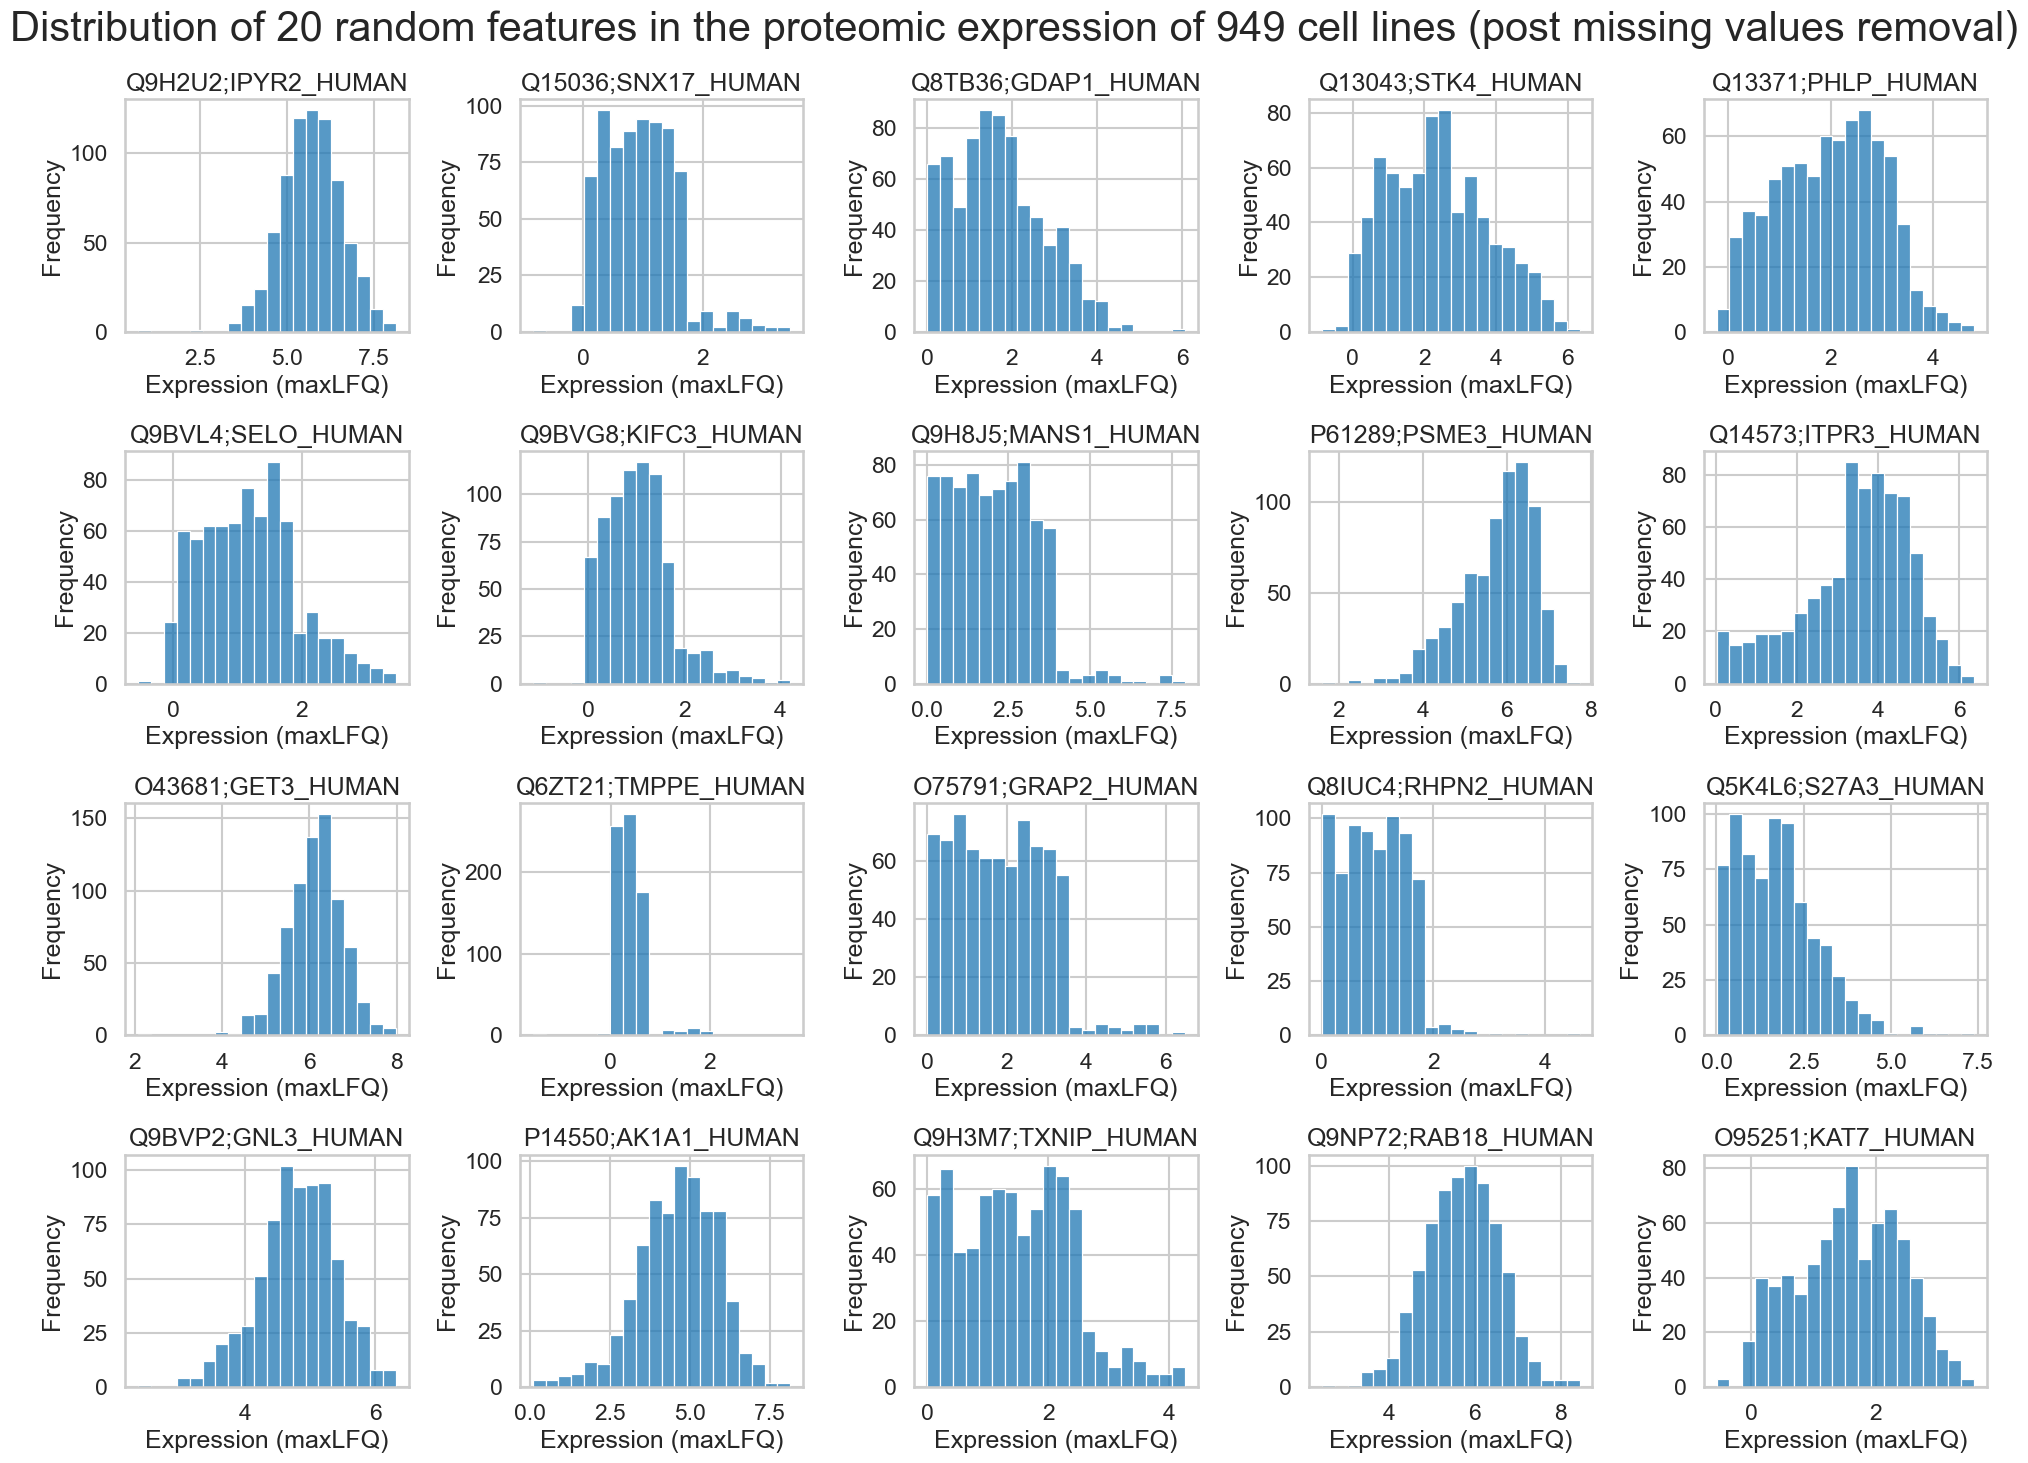

In [13]:

# plot the distribution of the features with less than 50% missing values

# get a random set of 20 features

np.random.seed(16)

m50_random_features = np.random.choice(missing_50_feature_data.columns, 20, replace=False)

fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(missing_50_feature_data[m50_random_features[i]], bins=20, ax=ax)
    ax.set_title(m50_random_features[i])
    ax.set_xlabel('Expression (maxLFQ)')
    ax.set_ylabel('Frequency')

# set a title for the whole plot
fig.suptitle('Distribution of 20 random features in the proteomic expression of 949 cell lines (post missing values removal)', fontsize=30)
fig.tight_layout()
plt.show()
